# Skull King Project

Skull King is a funny fold game for 2 to 6 players close to the tarot and belote games. The objective of this project is to implement a replica of the skull king board game and to develop Bot players based on Monte Carlo Tree Search algorithms.

Official rules of the game are included in this repo, please have a look at the *skull_king_rules.pdf*.

<img style="height: 150px; width: 250px" title="" alt="cards_image" src="./assets/cards.jpeg">

This file will be split in many parts:

1) Brief presentation of our work - Architecture of the code

2) How to play with our code and run games between random or mcts bots

3) Examples and analysis



### 1 - Brief presentation of our work - Architecture of the code

Skull King is a non-deterministic game with partial information and a variable number of players.
Because of its non-deterministic nature, legal moves to play are not always the same following a state s.
We decided to implement a simple version of MC algorithm. Each time a move has to be played, a copy of the state of the game is done. A move from the set of the legal moves is played and the rest of the game is played randomly. The algorithm saves the result of the game following the move and updates its statistics. This simulation is  done n_iterations times for each legal move. The legal move Which gave back the biggest number of victories is finally chosen to be the move to be played.

We have two versions of this algorithm:
- A cheating algorithm: The mcts player knows all cards that players have in hands and run simulations with total informations on the game.
- A non-cheating algorithm: The mcts player doesn't know the other players' cards. It uses information of the cards it has in hand and cards that have already be played to build possible hands for other players. The algorithm then runs it simulations on hands constructed this way.


### 2 - How to play with our code and run games

Our code is designed to let you play with the configuration of the game and run games as you want. Only *tqdm* dependency is required.

**Only 2 things to do to run games are:**

**1) Change instances' values of the class GameConfig**

**2) Run main.py**


**You can create automatically a reporting of the games which are played by setting the value of "log_level". The reporting will be saved as './games.log'**. This report is automatically created when you launch a game and is continuously saved for as long as the game is running.

*log_level = 'DEBUG'*: Show players' cards, very action which is played during the game (bids and played cards), and scores.

*log_level = 'INFO'*: Only show the scores.


Here is a brief overview of the architecture of our code:

- Deck.py: Contains Deck class. Deck contains the card list and allows players to draw cards from it.
- GameConfig.py: Contains GameConfig class. GameConfig contains tunable parameters to configurate the game'sand players' parameters. **It is the only file to modify to parametrize games**.
- game_logic.py: Contains the core functions which simulate a game of skull king and mcts algorithms.
- game_utils.py: Contains various complementary functions for  the game core functions.
- Game.py: Contains Game class. Game embeds all parameters which define a game state (cards, players, types) and is parametrized by the GameConfig class.
- main.py: Is the script to run to play games once GameConfig has been parametrized.
- Node.py: Contains Node class. Node represents a state of the game and the way to remember states' stats et move between them.

### 3 - Examples and analysis

Here below we run groups of games, each group with a different config to compare the strenght of both mcts algos (cheater and non-cheater) facing each other.

In [2]:
# !pip install tqdm
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
%cd ./src


c:\Users\tinta\Documents\SKULL_KING_PROJECT\src


In [130]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from GameConfig import GameConfig
from main import main

config = GameConfig
config.nb_games = 20
config.csv_name = 'games.csv'

### Test 1: RANDOM VS CHEATER MCTS

100%|██████████| 20/20 [00:08<00:00,  2.36it/s]


Text(0.5, 1.0, 'RANDOM VS CHEATER MCTS')

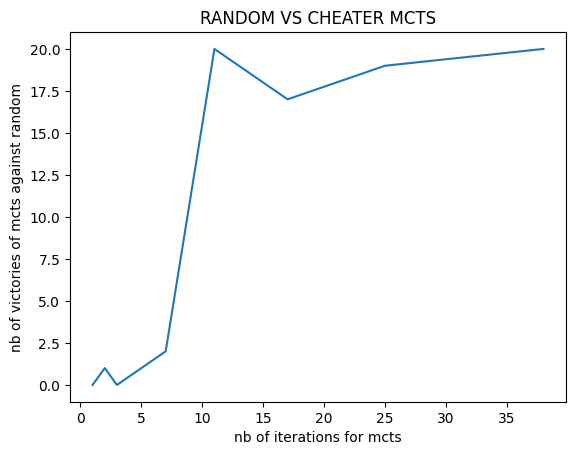

In [41]:
if Path(config.csv_name).is_file():
    Path(config.csv_name).unlink()

iters = [int(1.5 ** x) for x in range(10)]
for i, nb_iter in enumerate(iters):
    config.id_config = i
    config.nb_players = 2
    config.player_id2type_player = {0: 'random', 1: 'mcts'}
    config.player_id2is_cheater = {1: True}
    config.player_id2nb_of_iterations = {1: nb_iter}
    main(config)

df = pd.read_csv(config.csv_name).set_index('id_config')
# display(df[df['player_type'] == 'mcts'])

df_mcts = df[df['player_type'] == 'mcts']
plt.plot(df_mcts.loc[:, 'nb_iters'], df_mcts.loc[:, 'nb_victories'])
plt.ylabel(f'nb of victories of mcts against random / {config.nb_games}')
plt.xlabel('nb of iterations for mcts')
plt.title('RANDOM VS CHEATER MCTS')

### Test 2: RANDOM VS NON-CHEATER MCTS

100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


Text(0.5, 1.0, 'RANDOM VS NON-CHEATER MCTS')

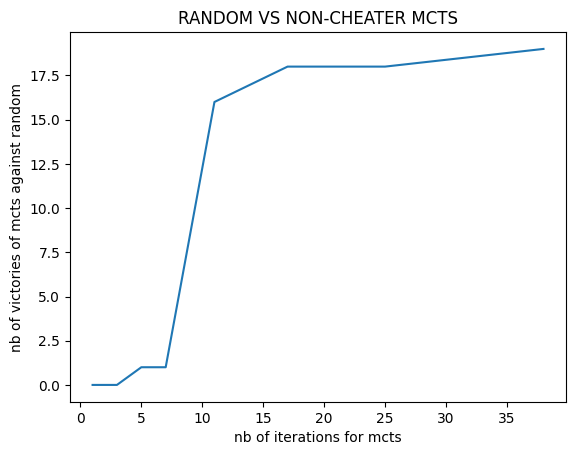

In [43]:
if Path(config.csv_name).is_file():
    Path(config.csv_name).unlink()

iters = [int(1.5 ** x) for x in range(10)]
for i, nb_iter in enumerate(iters):
    config.id_config = i
    config.nb_players = 2
    config.player_id2type_player = {0: 'random', 1: 'mcts'}
    config.player_id2is_cheater = {1: False}
    config.player_id2nb_of_iterations = {1: nb_iter}
    main(config)

df = pd.read_csv(config.csv_name).set_index('id_config')
# display(df[df['player_type'] == 'mcts'])

df_mcts = df[df['player_type'] == 'mcts']
plt.plot(df_mcts.loc[:, 'nb_iters'], df_mcts.loc[:, 'nb_victories'])
plt.ylabel(f'nb of victories of mcts against random / {config.nb_games}')
plt.xlabel('nb of iterations for mcts')
plt.title('RANDOM VS NON-CHEATER MCTS')

### Test 3: CHEATER MCTS VS NON-CHEATER MCTS

**(Code below is long to run, you may decrease the max_iter var)**

In [107]:
if Path(config.csv_name).is_file():
    Path(config.csv_name).unlink()

config_id = 0
max_iter = 6
iters = [int(2 ** x) for x in range(max_iter)]
iters2index = {v: k for k, v in enumerate(iters)}
for nb_iter0 in iters:
    for nb_iter1 in iters:
        config.id_config = config_id
        config.nb_players = 2
        config.player_id2type_player = {0: 'mcts', 1: 'mcts'}
        config.player_id2is_cheater = {0: True, 1: False}
        config.player_id2nb_of_iterations = {0: nb_iter0, 1: nb_iter1}
        main(config)
        config_id += 1
        if config_id % 10 == 0:
            print(f'{config_id} / {max_iter ** 2}')

100%|██████████| 20/20 [00:14<00:00,  1.39it/s]


10 / 36


100%|██████████| 20/20 [00:08<00:00,  2.35it/s]


20 / 36


100%|██████████| 20/20 [01:21<00:00,  4.09s/it]


30 / 36


100%|██████████| 20/20 [01:40<00:00,  5.01s/it]


<Axes: title={'center': 'Nb of victories of cheater on non-cheater / 20 games'}, xlabel='nb_iters_non_cheater', ylabel='nb_iters_cheater'>

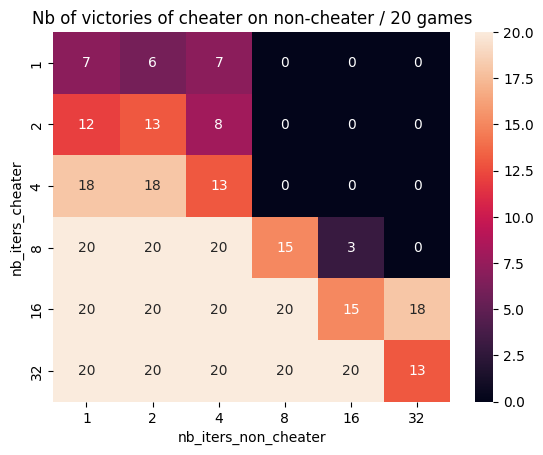

In [152]:
df = pd.read_csv(config.csv_name).set_index('id_config')
df_cheater = df[df['player_id'] == 0]
df_concat = pd.concat([df_cheater, pd.DataFrame(iters * max_iter)], axis=1, ignore_index=True)
df_concat = df_concat.rename(columns={2: 'victories', 4: 'nb_iters_cheater', 5: 'nb_iters_non_cheater'})
df_concat.loc[:, ['victories', 'nb_iters_cheater', 'nb_iters_non_cheater']]
glue = df_concat.pivot(index='nb_iters_cheater', columns='nb_iters_non_cheater', values='victories')
plt.title(f'Nb of victories of cheater on non-cheater / {config.nb_games} games')
sns.heatmap(glue, annot=True)

We can see that even if the cheater player who can see all cards has an advantage on the final score board, the non-cheater still wins frequently with just a bit more of iterations.

### Log example

'game.log' example file for a two players game that you can generate by setting log_level to 'DEBUG':
- Player 0: Random
- Player 1: mcts
```
DEBUG:root:Start main.py -------------------------------
INFO:root:Start game -------------------------------
DEBUG:root:Init round 1 (deal cards)
DEBUG:root:Cards player 0:[(6, 'yellow')]
DEBUG:root:Cards player 1:[(6, 'black')]
DEBUG:root:Start round 1
DEBUG:root:Prediction player 0: 0
DEBUG:root:Prediction player 1: 1
DEBUG:root:Fold 1: First player: 1
DEBUG:root:Played cards: [(6, 'black'), (6, 'yellow')]
DEBUG:root:Fold winner: 1
INFO:root:Round 1
INFO:root:SCORE Player 0; folds: 0/0 -> score: 10
INFO:root:SCORE Player 1; folds: 1/1 -> score: 20
DEBUG:root:Init round 2 (deal cards)
DEBUG:root:Cards player 0:[(12, 'black'), (5, 'red')]
DEBUG:root:Cards player 1:[(10, 'yellow'), (13, 'yellow')]
DEBUG:root:Start round 2
DEBUG:root:Prediction player 0: 2
DEBUG:root:Prediction player 1: 0
DEBUG:root:Fold 1: First player: 0
DEBUG:root:Played cards: [(5, 'red'), (10, 'yellow')]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 2: First player: 0
DEBUG:root:Played cards: [(12, 'black'), (13, 'yellow')]
DEBUG:root:Fold winner: 0
INFO:root:Round 2
INFO:root:SCORE Player 0; folds: 2/2 -> score: 50
INFO:root:SCORE Player 1; folds: 0/0 -> score: 40
DEBUG:root:Init round 3 (deal cards)
DEBUG:root:Cards player 0:[('pirate', None), (13, 'black'), (5, 'yellow')]
DEBUG:root:Cards player 1:[(11, 'red'), (12, 'black'), (2, 'yellow')]
DEBUG:root:Start round 3
DEBUG:root:Prediction player 0: 2
DEBUG:root:Prediction player 1: 0
DEBUG:root:Fold 1: First player: 1
DEBUG:root:Played cards: [(11, 'red'), (13, 'black')]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 2: First player: 0
DEBUG:root:Played cards: [(5, 'yellow'), (2, 'yellow')]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 3: First player: 0
DEBUG:root:Played cards: [('pirate', None), (12, 'black')]
DEBUG:root:Fold winner: 0
INFO:root:Round 3
INFO:root:SCORE Player 0; folds: 3/2 -> score: 40
INFO:root:SCORE Player 1; folds: 0/0 -> score: 70
DEBUG:root:Init round 4 (deal cards)
DEBUG:root:Cards player 0:[(4, 'black'), (11, 'red'), (1, 'black'), (10, 'yellow')]
DEBUG:root:Cards player 1:[('mermaid', None), ('pirate', None), (9, 'black'), (9, 'blue')]
DEBUG:root:Start round 4
DEBUG:root:Prediction player 0: 4
DEBUG:root:Prediction player 1: 3
DEBUG:root:Fold 1: First player: 0
DEBUG:root:Played cards: [(11, 'red'), ('pirate', None)]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 2: First player: 1
DEBUG:root:Played cards: [(9, 'blue'), (4, 'black')]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 3: First player: 0
DEBUG:root:Played cards: [(1, 'black'), ('mermaid', None)]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 4: First player: 1
DEBUG:root:Played cards: [(9, 'black'), (10, 'yellow')]
DEBUG:root:Fold winner: 1
INFO:root:Round 4
INFO:root:SCORE Player 0; folds: 1/4 -> score: 10
INFO:root:SCORE Player 1; folds: 3/3 -> score: 130
DEBUG:root:Init round 5 (deal cards)
DEBUG:root:Cards player 0:[('escape', None), (3, 'black'), (1, 'yellow'), (4, 'red'), ('pirate', None)]
DEBUG:root:Cards player 1:[(3, 'red'), (6, 'black'), (10, 'black'), (9, 'black'), ('escape', None)]
DEBUG:root:Start round 5
DEBUG:root:Prediction player 0: 1
DEBUG:root:Prediction player 1: 2
DEBUG:root:Fold 1: First player: 1
DEBUG:root:Played cards: [(10, 'black'), (3, 'black')]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 2: First player: 1
DEBUG:root:Played cards: [('escape', None), (1, 'yellow')]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 3: First player: 0
DEBUG:root:Played cards: [('escape', None), (3, 'red')]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 4: First player: 1
DEBUG:root:Played cards: [(6, 'black'), (4, 'red')]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 5: First player: 1
DEBUG:root:Played cards: [(9, 'black'), ('pirate', None)]
DEBUG:root:Fold winner: 0
INFO:root:Round 5
INFO:root:SCORE Player 0; folds: 2/1 -> score: 0
INFO:root:SCORE Player 1; folds: 3/2 -> score: 120
DEBUG:root:Init round 6 (deal cards)
DEBUG:root:Cards player 0:[(12, 'blue'), (10, 'yellow'), (6, 'blue'), ('pirate', None), (6, 'yellow'), (3, 'red')]
DEBUG:root:Cards player 1:[(4, 'black'), (8, 'yellow'), ('escape', None), (2, 'black'), (2, 'red'), (10, 'blue')]
DEBUG:root:Start round 6
DEBUG:root:Prediction player 0: 1
DEBUG:root:Prediction player 1: 1
DEBUG:root:Fold 1: First player: 0
DEBUG:root:Played cards: [(10, 'yellow'), (8, 'yellow')]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 2: First player: 0
DEBUG:root:Played cards: [(3, 'red'), (2, 'red')]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 3: First player: 0
DEBUG:root:Played cards: [(6, 'blue'), ('escape', None)]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 4: First player: 0
DEBUG:root:Played cards: [(6, 'yellow'), (4, 'black')]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 5: First player: 1
DEBUG:root:Played cards: [(2, 'black'), ('pirate', None)]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 6: First player: 0
DEBUG:root:Played cards: [(12, 'blue'), (10, 'blue')]
DEBUG:root:Fold winner: 0
INFO:root:Round 6
INFO:root:SCORE Player 0; folds: 5/1 -> score: -40
INFO:root:SCORE Player 1; folds: 1/1 -> score: 140
DEBUG:root:Init round 7 (deal cards)
DEBUG:root:Cards player 0:[(7, 'blue'), (3, 'black'), (12, 'black'), (3, 'red'), ('mermaid', None), (1, 'yellow'), ('escape', None)]
DEBUG:root:Cards player 1:[('pirate', None), ('escape', None), (2, 'black'), (13, 'red'), ('skull_king', None), (8, 'blue'), ('pirate', None)]
DEBUG:root:Start round 7
DEBUG:root:Prediction player 0: 3
DEBUG:root:Prediction player 1: 3
DEBUG:root:Fold 1: First player: 1
DEBUG:root:Played cards: [('skull_king', None), (3, 'red')]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 2: First player: 1
DEBUG:root:Played cards: [('pirate', None), ('mermaid', None)]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 3: First player: 1
DEBUG:root:Played cards: [(2, 'black'), ('escape', None)]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 4: First player: 1
DEBUG:root:Played cards: [('escape', None), (12, 'black')]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 5: First player: 0
DEBUG:root:Played cards: [(3, 'black'), ('pirate', None)]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 6: First player: 1
DEBUG:root:Played cards: [(13, 'red'), (1, 'yellow')]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 7: First player: 1
DEBUG:root:Played cards: [(8, 'blue'), (7, 'blue')]
DEBUG:root:Fold winner: 1
INFO:root:Round 7
INFO:root:SCORE Player 0; folds: 1/3 -> score: -60
INFO:root:SCORE Player 1; folds: 6/3 -> score: 110
DEBUG:root:Init round 8 (deal cards)
DEBUG:root:Cards player 0:[('escape', None), ('pirate', None), (6, 'yellow'), (7, 'red'), (9, 'yellow'), (2, 'red'), (1, 'yellow'), ('escape', None)]
DEBUG:root:Cards player 1:[(10, 'yellow'), (11, 'blue'), (7, 'yellow'), (10, 'black'), (12, 'black'), (12, 'yellow'), (1, 'red'), (9, 'black')]
DEBUG:root:Start round 8
DEBUG:root:Prediction player 0: 3
DEBUG:root:Prediction player 1: 6
DEBUG:root:Fold 1: First player: 0
DEBUG:root:Played cards: [(2, 'red'), (1, 'red')]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 2: First player: 0
DEBUG:root:Played cards: [(7, 'red'), (10, 'black')]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 3: First player: 1
DEBUG:root:Played cards: [(7, 'yellow'), ('escape', None)]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 4: First player: 1
DEBUG:root:Played cards: [(12, 'yellow'), (9, 'yellow')]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 5: First player: 1
DEBUG:root:Played cards: [(10, 'yellow'), ('escape', None)]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 6: First player: 1
DEBUG:root:Played cards: [(11, 'blue'), (6, 'yellow')]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 7: First player: 1
DEBUG:root:Played cards: [(9, 'black'), ('pirate', None)]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 8: First player: 0
DEBUG:root:Played cards: [(1, 'yellow'), (12, 'black')]
DEBUG:root:Fold winner: 1
INFO:root:Round 8
INFO:root:SCORE Player 0; folds: 2/3 -> score: -70
INFO:root:SCORE Player 1; folds: 6/6 -> score: 230
DEBUG:root:Init round 9 (deal cards)
DEBUG:root:Cards player 0:[('mermaid', None), (7, 'black'), (3, 'blue'), (2, 'blue'), (9, 'yellow'), ('escape', None), (10, 'blue'), (6, 'black'), (6, 'yellow')]
DEBUG:root:Cards player 1:[(3, 'black'), (4, 'red'), (4, 'yellow'), ('escape', None), ('pirate', None), (1, 'blue'), (2, 'black'), (8, 'black'), (5, 'black')]
DEBUG:root:Start round 9
DEBUG:root:Prediction player 0: 7
DEBUG:root:Prediction player 1: 5
DEBUG:root:Fold 1: First player: 1
DEBUG:root:Played cards: [(4, 'yellow'), (6, 'yellow')]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 2: First player: 0
DEBUG:root:Played cards: [(6, 'black'), (3, 'black')]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 3: First player: 0
DEBUG:root:Played cards: [(10, 'blue'), (1, 'blue')]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 4: First player: 0
DEBUG:root:Played cards: [(2, 'blue'), (4, 'red')]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 5: First player: 0
DEBUG:root:Played cards: [(3, 'blue'), ('escape', None)]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 6: First player: 0
DEBUG:root:Played cards: [(9, 'yellow'), (2, 'black')]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 7: First player: 1
DEBUG:root:Played cards: [('pirate', None), ('escape', None)]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 8: First player: 1
DEBUG:root:Played cards: [(8, 'black'), (7, 'black')]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 9: First player: 1
DEBUG:root:Played cards: [(5, 'black'), ('mermaid', None)]
DEBUG:root:Fold winner: 0
INFO:root:Round 9
INFO:root:SCORE Player 0; folds: 6/7 -> score: -80
INFO:root:SCORE Player 1; folds: 3/5 -> score: 210
DEBUG:root:Init round 10 (deal cards)
DEBUG:root:Cards player 0:[('pirate', None), (2, 'blue'), ('escape', None), (13, 'yellow'), (12, 'black'), (1, 'red'), (7, 'blue'), (11, 'yellow'), (10, 'red'), (4, 'yellow')]
DEBUG:root:Cards player 1:[('pirate', None), (13, 'blue'), (7, 'yellow'), (6, 'black'), (9, 'black'), (5, 'red'), ('escape', None), (1, 'yellow'), (10, 'blue'), ('escape', None)]
DEBUG:root:Start round 10
DEBUG:root:Prediction player 0: 3
DEBUG:root:Prediction player 1: 4
DEBUG:root:Fold 1: First player: 0
DEBUG:root:Played cards: [(10, 'red'), (5, 'red')]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 2: First player: 0
DEBUG:root:Played cards: [(2, 'blue'), ('escape', None)]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 3: First player: 0
DEBUG:root:Played cards: [(13, 'yellow'), (1, 'yellow')]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 4: First player: 0
DEBUG:root:Played cards: [(12, 'black'), (7, 'yellow')]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 5: First player: 0
DEBUG:root:Played cards: [(4, 'yellow'), (6, 'black')]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 6: First player: 1
DEBUG:root:Played cards: [(10, 'blue'), ('pirate', None)]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 7: First player: 0
DEBUG:root:Played cards: [(1, 'red'), ('pirate', None)]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 8: First player: 1
DEBUG:root:Played cards: [('escape', None), (7, 'blue')]
DEBUG:root:Fold winner: 0
DEBUG:root:Fold 9: First player: 0
DEBUG:root:Played cards: [(11, 'yellow'), (9, 'black')]
DEBUG:root:Fold winner: 1
DEBUG:root:Fold 10: First player: 1
DEBUG:root:Played cards: [(13, 'blue'), ('escape', None)]
DEBUG:root:Fold winner: 1
INFO:root:Round 10
INFO:root:SCORE Player 0; folds: 6/3 -> score: -110
INFO:root:SCORE Player 1; folds: 4/4 -> score: 290
INFO:root:End game -------------------------------
```

